# Argo data by float

## Data files organized by float

<img src="https://github.com/PedroVelez/argoonlineschool/raw/master/images/dac.png" alt="xarray logo" width="650"/>

Accessing the *dac* folder in any of the FTP or HTTP sites of andy of the GDAC you will find 11 folders, one for each of the DACs. As indicated in the figure, within each folder tehre is a folder for each one of the floatos. The number is knwon as the World Meteorological Organization (WMO) ID and it isunique for each float.

Lets use data from the first profile of float 6901255. It is pre-downloaded in the *./Data* folder, but you can dowload it from the Coriolis GDAC:
`! wget ftp://ftp.ifremer.fr/ifremer/argo/dac/coriolis/6901255/profiles/R6901255_001.nc`

In [2]:
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
xrDS = xr.open_dataset('./Data/R6901255_001.nc')
xrDS

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 3, N_LEVELS: 49, N_PARAM: 3, N_PROF: 2)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    PLATFORM_TYPE                 (N_PROF) object ...
    FLOAT_SERIAL_NO               (N_PROF) object ...
    FIRMWARE_VERSION              (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) datetime64[ns] ...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) datetime64[ns] ...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    VERTICAL_SAMPLING_SCHEME      (N_PROF) object ...
    CONFIG_MISSION_NUMBER         (N_PROF) float64 ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    HISTORY_INSTITUTION           (N_HISTORY, N_PROF) object ...
    HISTORY_STEP                  (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE              (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE_RELEASE      (N_HISTORY, N_PROF) object ...
    HISTORY_REFERENCE             (N_HISTORY, N_PROF) object ...
    HISTORY_DATE                  (N_HISTORY, N_PROF) object ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CAL

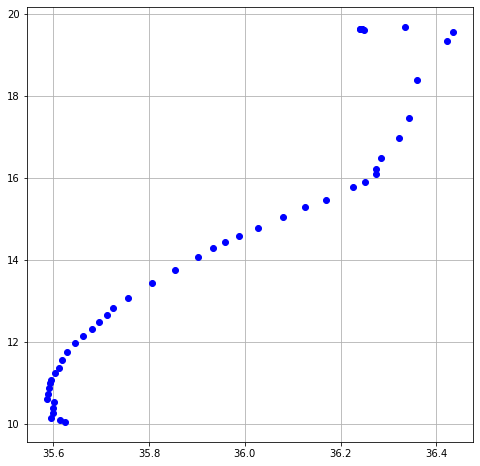

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xrDS.PSAL,xrDS.TEMP,'bo')
ax.grid()


sobre ptem...

In [7]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

/Users/pvb/miniconda3/envs/AOS/lib/python3.8/site-packages/argopy/plotters.py:33: UserWarning: argopy requires cartopy installed for full map plotting functionality
  warnings.warn("argopy requires cartopy installed for full map plotting functionality")
/Users/pvb/miniconda3/envs/AOS/lib/python3.8/site-packages/argopy/plotters.py:41: UserWarning: argopy requires seaborn installed for full plotting functionality
  warnings.warn("argopy requires seaborn installed for full plotting functionality")


In [16]:
apDS=argo_loader.float(6901255).to_xarray()

In [18]:
apDS2=argo_loader.profile(6901255,1).to_xarray()

In [20]:
apDS2.argo.point2profile()

<xarray.Dataset>
Dimensions:          (N_LEVELS: 49, N_PROF: 2)
Coordinates:
    TIME             (N_PROF) datetime64[ns] 2019-06-19T11:43:00 2019-06-21T05:38:00
    LONGITUDE        (N_PROF) float64 -6.934 -6.991
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48
  * N_PROF           (N_PROF) int64 0 1
    LATITUDE         (N_PROF) float64 35.85 35.91
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 1 1
    DATA_MODE        (N_PROF) <U1 'R' 'R'
    DIRECTION        (N_PROF) <U1 'D' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6901255 6901255
    POSITION_QC      (N_PROF) int64 1 1
    PRES             (N_PROF, N_LEVELS) float64 14.0 24.0 34.0 ... 788.0 813.0
    PRES_QC          (N_PROF) int64 1 1
    PSAL             (N_PROF, N_LEVELS) float64 36.35 36.45 ... 35.61 35.62
    PSAL_QC          (N_PROF) int64 1 1
    TEMP             (N_PROF, N_LEVELS) float64 19.87 19.69 18.74 ... 10.1 10.05
    TEMP_QC          (N_PROF) int64 1 1
    TIME_QC          (N_PROF) int64 1 1
Attributes:
    cdm_altitude_proxy:        pres
    cdm_data_type:             TrajectoryProfile
    cdm_profile_variables:     cycle_number, data_type, format_version, handb...
    cdm_trajectory_variables:  platform_number, project_name, pi_name, platfo...
    Conventions:               Argo-3.1, CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@argo.net
    creator_name:              Argo
    creator_url:               http://www.argo.net/
    Easternmost_Easting:       -6.934000000000026
    featureType:               TrajectoryProfile
    geospatial_lat_max:        35.915
    geospatial_lat_min:        35.846
    geospatial_lat_units:      degrees_north
    geospatial_lon_max:        -6.934000000000026
    geospatial_lon_min:        -6.9909999999999854
    geospatial_lon_units:      degrees_east
    history:                   2020-06-30T15:17:32Z (local files)\n2020-06-30...
    id:                        ArgoFloats
    infoUrl:                   http://www.argo.net/
    institution:               Argo
    keywords:                  adjusted, argo, array, assembly, best, centre,...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The data may be used and redistributed for fre...
    Northernmost_Northing:     35.915
    references:                http://www.argodatamgt.org/Documentation
    source:                    Argo float
    sourceUrl:                 (local files)
    Southernmost_Northing:     35.846
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Argo float vertical profiles from Coriolis Glo...
    time_coverage_end:         2019-06-21T05:38:00Z
    time_coverage_start:       2019-06-19T11:43:00Z
    title:                     Argo Float Measurements
    user_manual_version:       3.1
    Westernmost_Easting:       -6.9909999999999854
    DATA_ID:                   ARGO
    DOI:                       http://doi.org/10.17882/42182
    Fetched_from:              http://www.ifremer.fr/erddap
    Fetched_by:                pvb
    Fetched_date:              2020/06/30
    Fetched_constraints:       phy_WMO6901255_CYC0001
    Fetched_uri:               http://www.ifremer.fr/erddap/tabledap/ArgoFloa...